# Predicting Confirmed Cases in India

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from time import time
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/chesterking123/PredictingCovid19India-Arima/master/datatill5apr.csv')

In [3]:
del df['Unnamed: 0']

In [4]:
df.size

201

In [5]:
df.describe()

,TotalConfirmed,TotalDeceased
count,67.000000,67.000000
mean,397.298507,10.074627
std,882.095491,24.606179
min,1.000000,0.000000
25%,3.000000,0.000000
50%,6.000000,0.000000
75%,228.000000,4.000000
max,4289.000000,121.000000


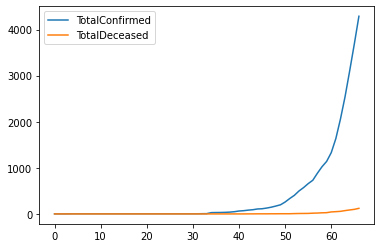

In [6]:
df.plot()

In [7]:
del df['TotalDeceased']

In [8]:
confirmedcases = df['TotalConfirmed'].to_list()
confirmedcases

[1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 6,
 28,
 30,
 31,
 34,
 39,
 48,
 63,
 70,
 82,
 91,
 107,
 112,
 127,
 146,
 171,
 198,
 258,
 334,
 403,
 497,
 571,
 657,
 730,
 883,
 1024,
 1139,
 1329,
 1635,
 2059,
 2545,
 3105,
 3684,
 4289]

In [9]:
plotconf = df['TotalConfirmed']

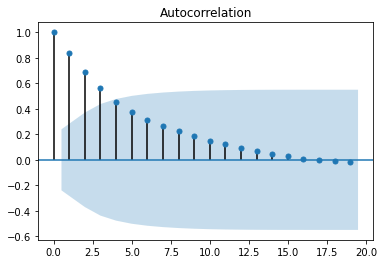

In [10]:
plot_acf(plotconf)
pyplot.show()

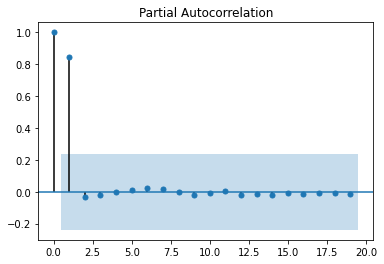

In [11]:
plot_pacf(plotconf)
pyplot.show()

In [12]:
model_arima=ARIMA(confirmedcases,(1,2,0))
model_arima_fit=model_arima.fit()
prediction_arima=model_arima_fit.forecast(10)[0]
prediction_arima

array([ 4912.10552052,  5549.18288871,  6198.06764887,  6857.62645816,
        7527.26588055,  8206.67518367,  8895.69166318,  9594.23012456,
       10302.24595861, 11019.71580728])

In [13]:
plotingconfirmed = df.copy()

In [14]:
oneweekdates = ['4/6/20','4/7/20','4/8/20','4/9/20','4/10/20','4/11/20','4/12/20','4/13/20','4/14/20','4/15/20']

In [15]:
j=1
for i in range(len(oneweekdates)):
    plotingconfirmed.loc[66+j,'Date'] = oneweekdates[i]
    plotingconfirmed.loc[66+j,'TotalConfirmed'] =int(prediction_arima[i])
    j=j+1

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 <a list of 10 Text major ticklabel objects>)

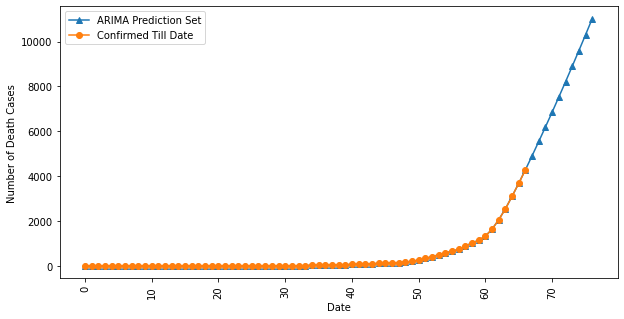

In [16]:
pyplot.figure(figsize=(10,5))
pyplot.plot(plotingconfirmed["TotalConfirmed"],label="ARIMA Prediction Set",marker="^")
pyplot.plot(df["TotalConfirmed"],label="Confirmed Till Date",marker="o")
pyplot.legend()
pyplot.xlabel("Date")
pyplot.ylabel("Number of Death Cases")
pyplot.xticks(rotation=90)

In [17]:
plotingconfirmed.tail(7)

,Date,TotalConfirmed
70,4/9/20,6857.0
71,4/10/20,7527.0
72,4/11/20,8206.0
73,4/12/20,8895.0
74,4/13/20,9594.0
75,4/14/20,10302.0
76,4/15/20,11019.0
